In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

psm_df = pd.read_csv('psm.TSV', delimiter = "\t")
# prot_df = prot_df.drop(['Entry Name', 'Gene', 'Length', 'Organism', 'Protein Description', 'Protein Existence', 'Protein Probability', 'Top Peptide Probability',
#                        'Total Peptides', 'Unique Peptides', 'Razor Peptides', 'Total Spectral Count', 'Unique Spectral Count',
#                        'Razor Spectral Count', 'Total Intensity', 'Unique Intensity', 'Razor Intensity', 'Razor Assigned Modifications',
#                        'Razor Observed Modifications', 'Indistinguishable Proteins'], axis=1)

psm_df = psm_df.rename(columns={'sample-01': '126', 'sample-02': '127C', 'sample-03': '127N', 'sample-04': '128C', 'sample-05': '128N',
                               'sample-06': '129C', 'sample-07': '129N', 'sample-08': '130C', 'sample-09': '130N', 'sample-10': '131C', 'sample-11': '131N',
                               'sample-12': '132C', 'sample-13': '132N', 'sample-14': '133C', 'sample-15': '133N', 'sample-16': '134N'})


psm_df = pd.melt(psm_df, id_vars=['Peptide'], value_vars=["126","127C","127N","128C","128N","129C","129N","130C",
                                                          "130N","131C","131N","132C","132N","133C","133N","134N"])

# DO A COLUMN TITLE SWAP

psm_df["value"] = psm_df["value"].apply(np.log10)

# psm_df


In [6]:
psm_df = psm_df.sort_values(by=['Boost_Spillover'], ascending=False)
psm_df = psm_df.drop(['131C', '131N', '132C', '132N', '133C', '133N', '134N'], axis = 1)
psm_df.head(20)

,Spectrum,Spectrum File,Peptide,Modified Peptide,Prev AA,Next AA,Peptide Length,Charge,Retention,Observed Mass,...,127C,127N,128C,128N,129C,129N,130C,130N,Boost_Spillover,Boost_logged
7483,CellenONE_I3T_NEM_SC_Chip1_C1.27759.27759.3,D:\Users\PCL_user\Mass_Spec\data\TMT_sc_data\D...,IVAVIGAVVDVQFDEGLPPILNALEVQGR,n[305]IVAVIGAVVDVQFDEGLPPILNALEVQGR,R,E,29,3,7604.5692,3335.9102,...,198.5203,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.593687,2.524247
1559,CellenONE_I3T_NEM_SC_Chip1_C1.09734.09734.3,D:\Users\PCL_user\Mass_Spec\data\TMT_sc_data\D...,RLVIQDK,n[305]RLVIQDK,K,N,7,3,2749.0837,1478.9540,...,72497.2812,12438.0947,4124.2817,245.1891,0.0000,0.0000,1044.7936,791.7949,0.370362,5.291696
1932,CellenONE_I3T_NEM_SC_Chip1_C1.11012.11012.3,D:\Users\PCL_user\Mass_Spec\data\TMT_sc_data\D...,RLIPDGCGVK,n[305]RLIPDGCGVK,K,Y,10,3,3091.2437,1722.0225,...,50656.3125,11139.5244,2024.0114,510.3807,0.0000,0.0000,1141.2295,852.8189,0.349579,5.161089
3853,CellenONE_I3T_NEM_SC_Chip1_C1.16784.16784.3,D:\Users\PCL_user\Mass_Spec\data\TMT_sc_data\D...,ARFEELNADLFR,n[305]ARFEELNADLFR,R,G,12,3,4639.6678,1783.9666,...,46230.5195,18494.6836,4041.4326,704.8124,0.0000,0.0000,867.3691,0.0000,0.292452,5.198875
5781,CellenONE_I3T_NEM_SC_Chip1_C1.21915.21915.3,D:\Users\PCL_user\Mass_Spec\data\TMT_sc_data\D...,VNPCIGGVILFHETLYQK,n[305]VNPCIGGVILFHETLYQK,R,A,18,3,6019.8317,2695.5240,...,38151.4062,8164.3452,2212.3271,0.0000,0.0000,0.0000,428.7226,291.6759,0.280683,5.133294
4541,CellenONE_I3T_NEM_SC_Chip1_C1.18660.18660.3,D:\Users\PCL_user\Mass_Spec\data\TMT_sc_data\D...,RVLQALEGLK,n[305]RVLQALEGLK,R,M,10,3,5143.2225,1734.1147,...,31393.5391,10712.0723,2736.9023,255.5341,0.0000,0.0000,988.2501,804.5879,0.272429,5.061587
7415,CellenONE_I3T_NEM_SC_Chip1_C1.27178.27178.3,D:\Users\PCL_user\Mass_Spec\data\TMT_sc_data\D...,YSVWIGGSILASLSTFQQMWISK,n[305]YSVWIGGSILASLSTFQQM[147]WISK,K,Q,23,3,7438.7471,3226.7612,...,281.7514,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.271804,3.015610
2378,CellenONE_I3T_NEM_SC_Chip1_C1.12417.12417.3,D:\Users\PCL_user\Mass_Spec\data\TMT_sc_data\D...,EDVFVHQTAIK,n[305]EDVFVHQTAIK,K,K,11,3,3467.2577,1894.0957,...,63430.5859,24674.8066,5032.0576,602.1921,0.0000,0.0000,1871.2819,481.9793,0.268462,5.373416
2523,CellenONE_I3T_NEM_SC_Chip1_C1.12882.12882.4,D:\Users\PCL_user\Mass_Spec\data\TMT_sc_data\D...,IWHHTFYNELR,n[305]IWHHTFYNELR,K,V,11,4,3591.9521,1818.9625,...,62353.8281,19514.5957,5274.9175,526.3724,0.0000,0.0000,692.7517,0.0000,0.264379,5.372636
2592,CellenONE_I3T_NEM_SC_Chip1_C1.13108.13108.3,D:\Users\PCL_user\Mass_Spec\data\TMT_sc_data\D...,RGILTLK,n[305]RGILTLK,K,Y,7,3,3652.4881,1407.9524,...,968687.6250,101540.1562,47002.0156,636.9598,0.0000,0.0000,0.0000,526.9793,0.261009,6.569528


C:\Users\conno\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\conno\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\conno\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\conno\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\conno\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


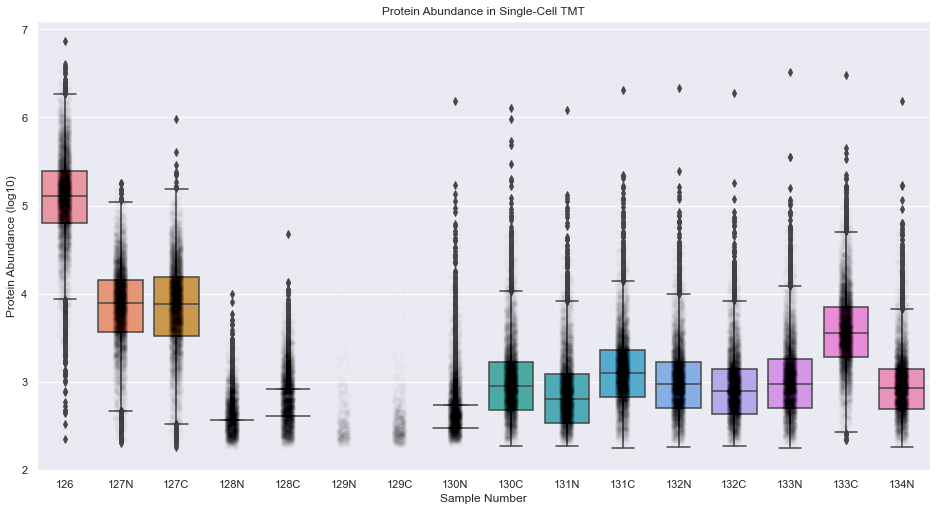

In [9]:
plt.figure(figsize=(16, 8.27))
# color_match = {"126": E1DCEE, "127N": E1DCEE}

boxplot = sns.boxplot(data=psm_df, x="variable", y="value", # palette = color_match, # Recolor to match illustration, Change orderings to N, C
                      order=["126","127N","127C","128N","128C","129N","129C","130N",
                             "130C","131N","131C","132N","132C","133N","133C","134N"])
boxplot.set_title("Protein Abundance in Single-Cell TMT")
boxplot = sns.stripplot(data=psm_df, x="variable", y="value", color='0', jitter=True, alpha=0.01, 
                     order=["126","127N","127C","128N","128C","129N","129C","130N",
                             "130C","131N","131C","132N","132C","133N","133C","134N"])
boxplot.set(xlabel="Sample Number", ylabel="Protein Abundance (log10)")
# boxplot.set_xticklabels(boxplot.get_xticklabels(),rotation=30)
plt.show()

In [ ]:
# Sample 1 = Boost (126)
# Sample 2 = 13C Spillover (127C)
# Sample 3 = Reference (127N)
# Sample 4 = Reference 15N Spillover
# Sample 5 = Double 13C Spillover?? (Just Blank)
# Sample 6 = Double 15N Spillover??? (Just Blank)
# Sample 7 = Blankiest Blank